<a href="https://colab.research.google.com/github/101-Knight/FUTURE_DS_03/blob/main/Student_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [14]:
df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='latin1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [15]:
df.shape
df.columns
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [16]:
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [17]:
df = df.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-1277559549.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [18]:
rating_columns = df.select_dtypes(include=['int64', 'float64']).columns
rating_columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Weightage 1',
       'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5'],
      dtype='object')

In [19]:
df['Overall_Rating'] = df[rating_columns].mean(axis=1)
df[['Overall_Rating']].head()

,Overall_Rating
0,1.875
1,2.000
2,2.125
3,2.250
4,2.375


In [20]:
df['Overall_Rating'].describe()

,Overall_Rating
count,580.000000
mean,16.454741
std,16.676234
min,1.875000
25%,5.125000
50%,9.750000
75%,22.656250
max,81.625000


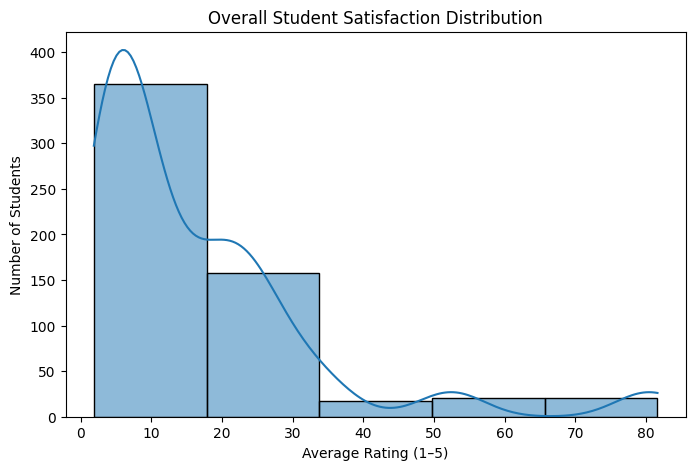

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Overall_Rating'], bins=5, kde=True)
plt.title('Overall Student Satisfaction Distribution')
plt.xlabel('Average Rating (1–5)')
plt.ylabel('Number of Students')
plt.show()

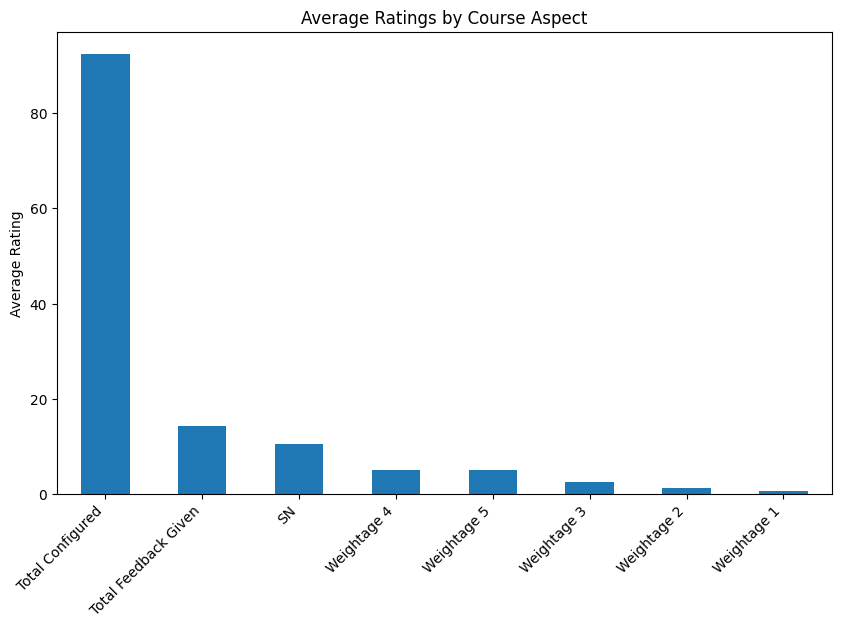

In [22]:
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)
avg_ratings

plt.figure(figsize=(10,6))
avg_ratings.plot(kind='bar')
plt.title('Average Ratings by Course Aspect')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
df.select_dtypes(include='object').columns

Index(['Questions', 'Average/ Percentage', 'Course Name ', 'Basic Course'], dtype='object')

In [27]:
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [41]:
# Create synthetic comments for NLP demonstration
sample_comments = [
    "The course was very informative and well structured",
    "Good teaching but assignments were challenging",
    "Excellent explanation of concepts by the instructor",
    "Average experience, could be more interactive",
    "The content was relevant and useful",
    "Pace of the course was a bit fast",
    "Very supportive faculty and clear lectures",
    "Satisfactory course but needs improvement",
    "Great learning experience overall",
    "Not very engaging, but content was okay",
    "The course was poorly structured and confusing",
    "Very difficult to understand the concepts",
    "Not engaging and lacks proper explanation"
]

import numpy as np
df['Comments'] = np.random.choice(sample_comments, size=len(df))

In [42]:
df['Sentiment'] = df['Comments'].apply(analyze_sentiment)

df[['Comments', 'Sentiment']].head()

,Comments,Sentiment
0,The course was very informative and well struc...,Positive
1,Very difficult to understand the concepts,Negative
2,Good teaching but assignments were challenging,Positive
3,The course was very informative and well struc...,Positive
4,The course was very informative and well struc...,Positive


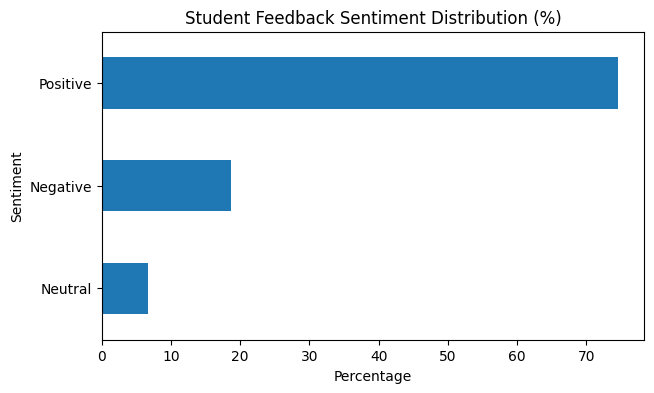

In [43]:
sentiment_percent = df['Sentiment'].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sentiment_percent.sort_values().plot(kind='barh')

plt.title('Student Feedback Sentiment Distribution (%)')
plt.xlabel('Percentage')
plt.ylabel('Sentiment')
plt.show()

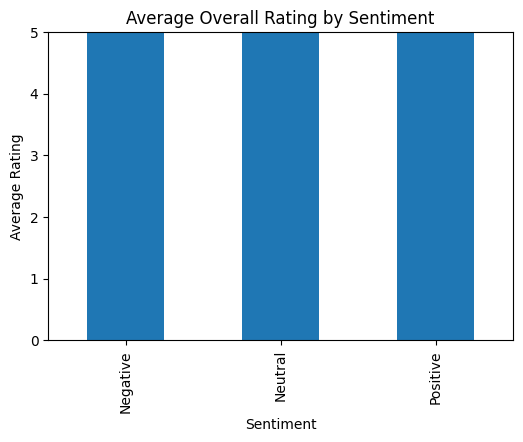

In [44]:
sentiment_rating_avg = df.groupby('Sentiment')['Overall_Rating'].mean()

plt.figure(figsize=(6,4))
sentiment_rating_avg.plot(kind='bar')

plt.title('Average Overall Rating by Sentiment')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.show()

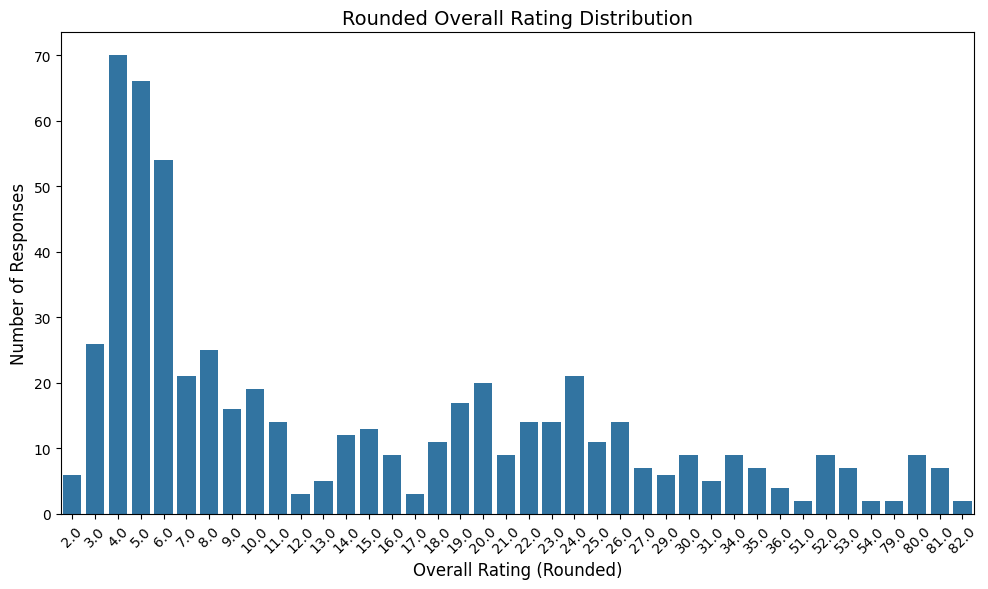

In [45]:
plt.figure(figsize=(10, 6))

sns.countplot(
    x='Rounded_Rating',
    data=df
)

plt.title('Rounded Overall Rating Distribution', fontsize=14)
plt.xlabel('Overall Rating (Rounded)', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


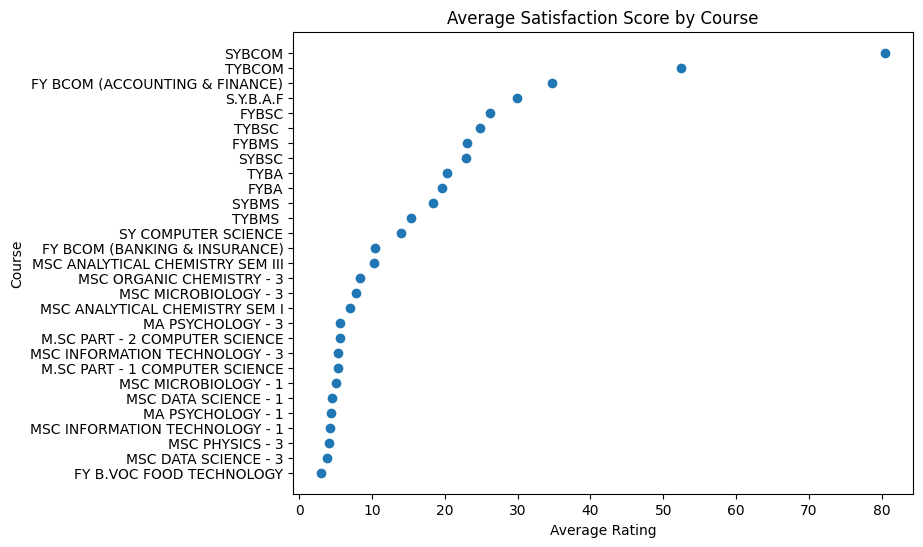

In [46]:
course_avg = df.groupby('Course Name ')['Overall_Rating'].mean().sort_values()

plt.figure(figsize=(8,6))
plt.scatter(course_avg.values, course_avg.index)

plt.title('Average Satisfaction Score by Course')
plt.xlabel('Average Rating')
plt.ylabel('Course')
plt.show()

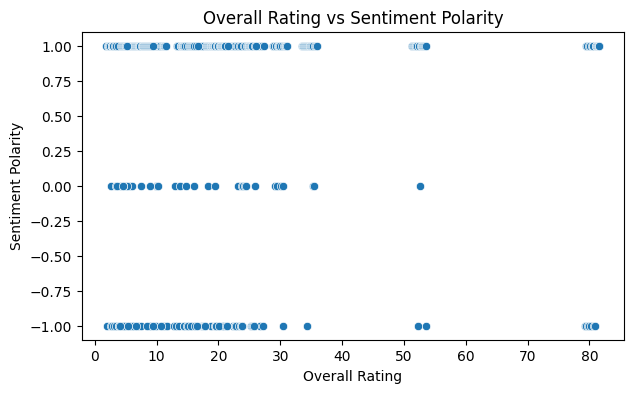

In [47]:
sentiment_map = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_map)

plt.figure(figsize=(7,4))
sns.scatterplot(
    x='Overall_Rating',
    y='Sentiment_Score',
    data=df
)

plt.title('Overall Rating vs Sentiment Polarity')
plt.xlabel('Overall Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

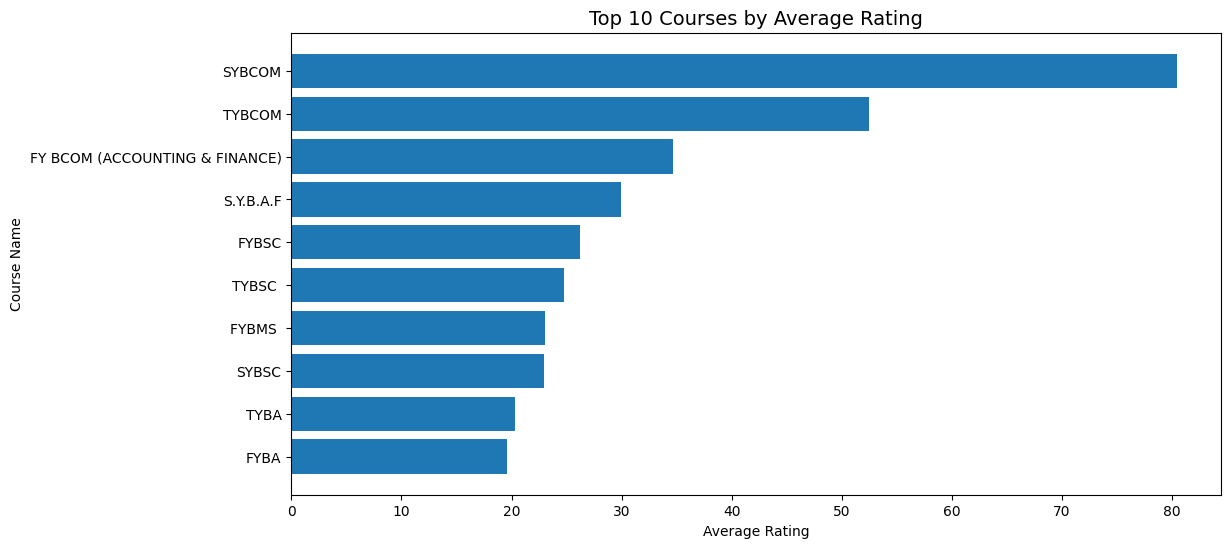

In [48]:
top_courses = (
    df.groupby('Course Name ')['Overall_Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.barh(top_courses.index, top_courses.values)

plt.title('Top 10 Courses by Average Rating', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Course Name')

plt.gca().invert_yaxis()
plt.show()


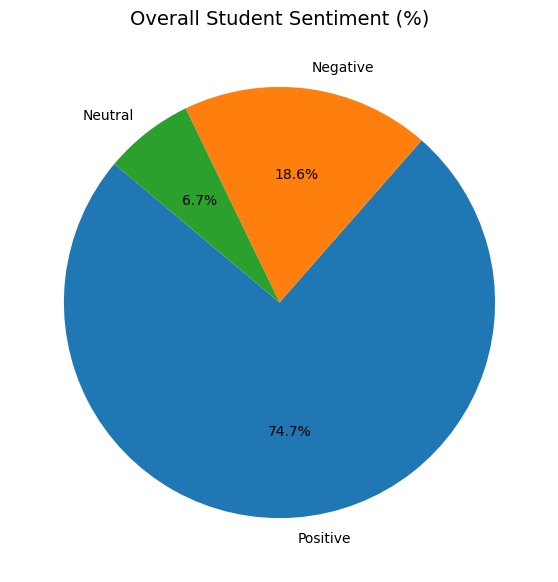

In [49]:
sentiment_percent = df['Sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(7, 7))
plt.pie(
    sentiment_percent,
    labels=sentiment_percent.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Overall Student Sentiment (%)', fontsize=14)
plt.show()
